# Grassfire Straight Skeleton Demo

This notebook demonstrates how to use the `grassfire` package to compute the straight skeleton of a simple polygon.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
from tri.delaunay.helpers import ToPointsAndSegments
from grassfire import calc_skel
import json
import requests

def plot_skeleton(poly_coords_list, title="Grassfire Straight Skeleton Demo"):
    """
    Computes and plots the straight skeleton for a list of polygon coords.
    Supports multiple rings (first ring is outer, subsequent are holes).
    """
    conv = ToPointsAndSegments()
    
    # Add points and segments for all rings
    for ring in poly_coords_list:
        # Add points
        for p in ring:
            conv.add_point(tuple(p))
        
        # Add segments
        for i in range(len(ring)):
            start = tuple(ring[i])
            end = tuple(ring[(i + 1) % len(ring)])
            conv.add_segment(start, end)

    # Calculate the skeleton
    print(f"Calculating skeleton for {title}...")
    skel = calc_skel(conv, internal_only=True)

    # Plotting
    plt.figure(figsize=(10, 10))
    
    # Plot original polygon rings
    for i, ring in enumerate(poly_coords_list):
        x_poly = [p[0] for p in ring] + [ring[0][0]]
        y_poly = [p[1] for p in ring] + [ring[0][1]]
        label = "Outer Boundary" if i == 0 else f"Hole {i}"
        color = 'b-' if i == 0 else 'g-'
        plt.plot(x_poly, y_poly, color, label=label, linewidth=2)

    # Plot the skeleton segments
    segments = skel.segments()
    for segment in segments:
        (start, end), infos = segment
        plt.plot([start[0], end[0]], [start[1], end[1]], 'r--', linewidth=1.5)

    plt.plot([], [], 'r--', label='Grassfire Skeleton') # For legend
    plt.legend()
    plt.axis('equal')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.title(title)
    plt.gca().invert_yaxis() # Often needed for pixel-space coordinates
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Simple House Shape

Calculating skeleton for House Shape...


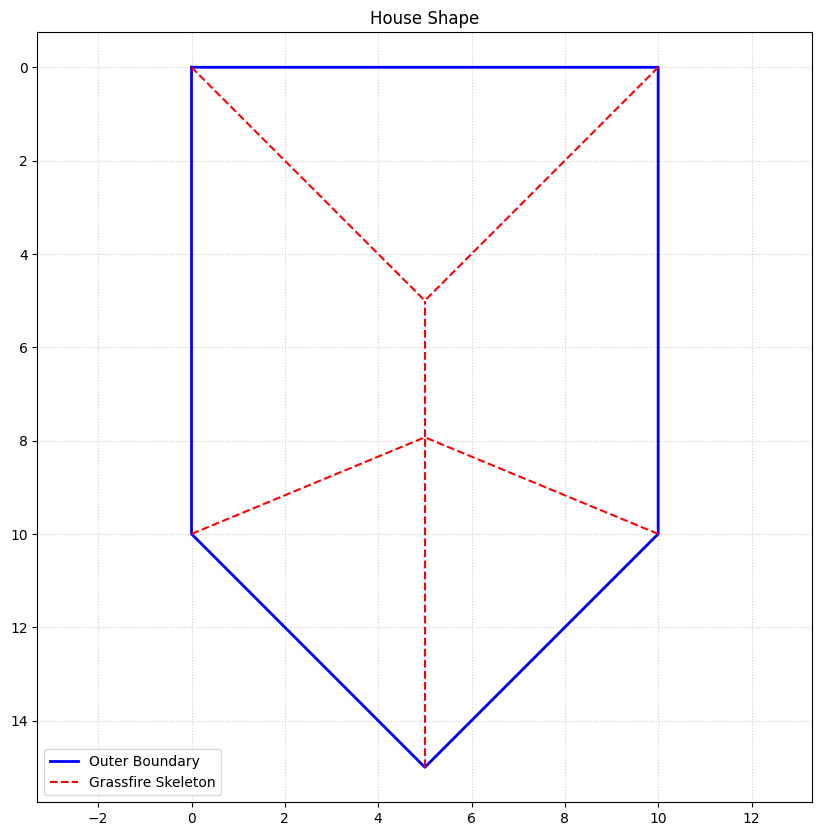

In [4]:
house = [[
    [0.0, 0.0], [10.0, 0.0], [10.0, 10.0], [5.0, 15.0], [0.0, 10.0]
]]
plot_skeleton(house, "House Shape")

## 2. L-Shaped Polygon

Calculating skeleton for L-Shape Polygon...


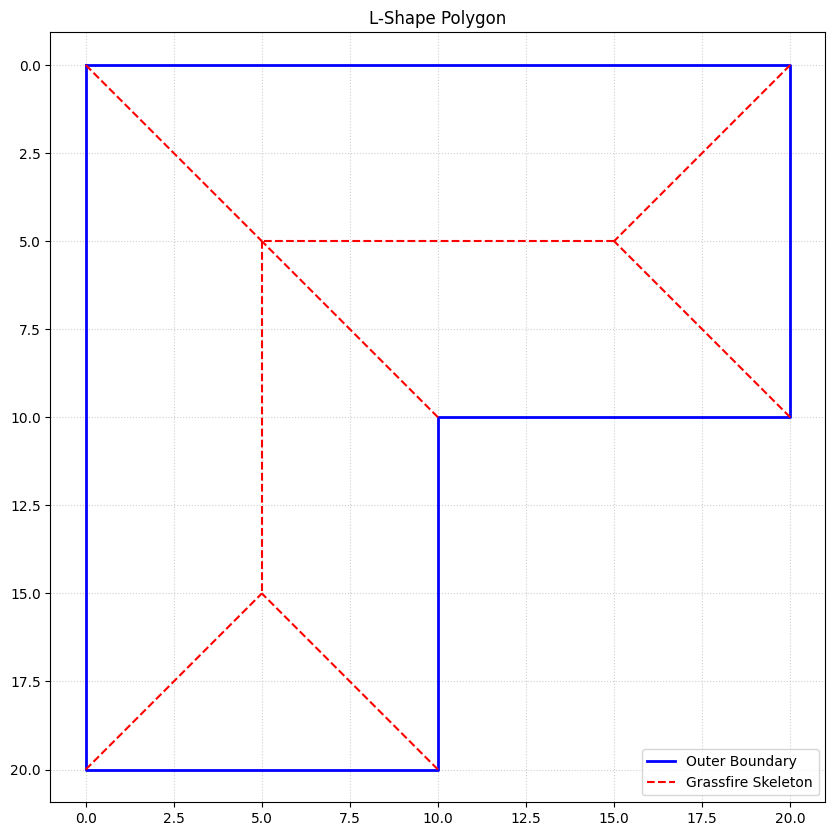

In [5]:
l_shape = [[
    [0.0, 0.0], [20.0, 0.0], [20.0, 10.0], [10.0, 10.0], [10.0, 20.0], [0.0, 20.0]
]]
plot_skeleton(l_shape, "L-Shape Polygon")

## 3. Complex Polygon from Archive

Calculating skeleton for mei-5...


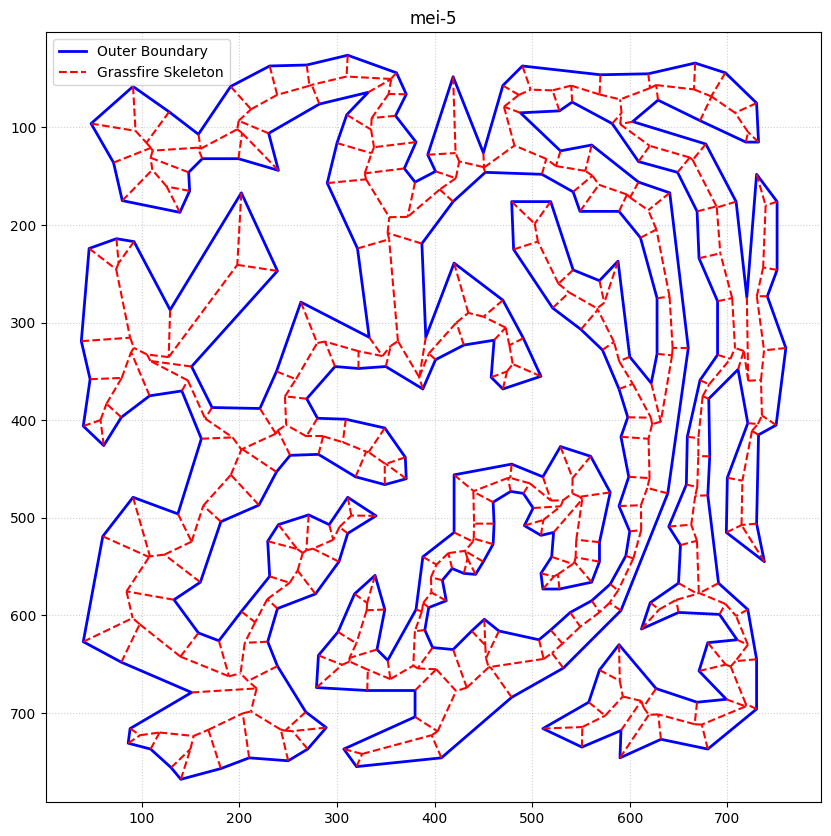

In [10]:
poly = "mei-5"
url = f"https://raw.githubusercontent.com/LingDong-/interesting-polygon-archive/master/json/{poly}.json"
eberly_coords = requests.get(url).json()

plot_skeleton(eberly_coords, f"{poly}")

## 4. Another Complex Polygon from Archive

Calculating skeleton for matisse-alga...


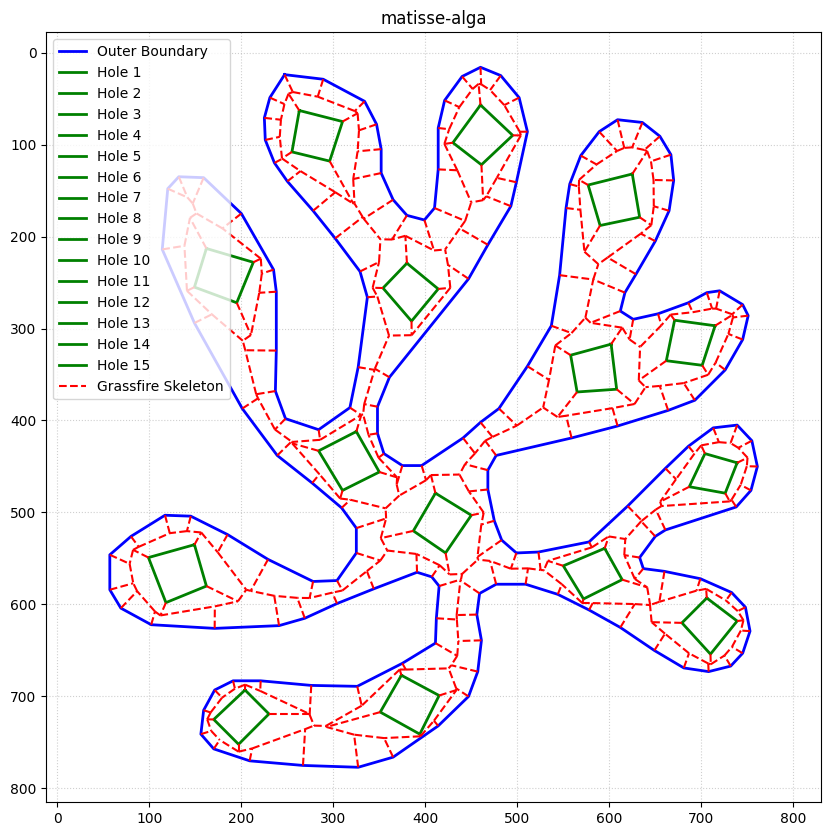

In [12]:
poly = "matisse-alga"
url = f"https://raw.githubusercontent.com/LingDong-/interesting-polygon-archive/master/json/{poly}.json"
eberly_coords = requests.get(url).json()

plot_skeleton(eberly_coords, f"{poly}")